In [111]:
from re import A
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D


df = lambda x: np.array([2*x[0],2*x[1]])
f  = lambda x: x[0]**2 + x[1]**2

x = np.array([[2],[2]])


In [112]:

def grad(x, step:float =0.01):
    df_dx1_ = f(x)
    x[0] = x[0]+step
    df_dx1_p = f(x)
    x[0] = x[0]-step
    df_dx2_ = f(x)
    x[1] = x[1]+step
    df_dx2_p = f(x)
    x[1] = x[1]-step
    arr = np.array([(df_dx1_p-df_dx1_)/step, (df_dx2_p-df_dx2_)/step])
    return arr


def fun(x,y):
    return x**2 + y**2

def Optimix(x:np.ndarray, eps:float = 0.0001, step:float = 0.1)->np.ndarray:
    arr = np.array(x)
    val = np.array([fun(x[0],x[1])])
    
    while True:
        val = np.append(val, f(x))
        x = x - step * grad(x)
        arr = np.append(arr,x, axis = 1)
        if(np.linalg.norm(grad(x))<eps):
            break
    return arr, val

y, z = Optimix(x)
#print(y)
#print(z)

#plt.plot(y[0], y[1])
#plt.scatter(y[0], y[1])

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot(y[0], y[1], z[0], label='parametric curve')
#ax.scatter(y[0], y[1], z[0])






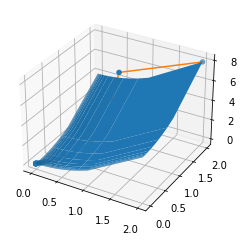

In [113]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


X,Y = np.meshgrid(y[0], y[1])
ax.plot_surface(X,Y,fun(X,Y), rstride = 2, cstride = 2)



ax.plot(y[0], y[1], z, label='parametric curve')
ax.scatter(y[0], y[1], z)
plt.show()

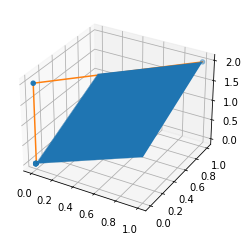